In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


In [4]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("New shape:", X_train.shape)

New shape: (60000, 28, 28, 1)


In [5]:
model = keras.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

c:\Users\adity\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=64
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9185 - loss: 0.2649 - val_accuracy: 0.9816 - val_loss: 0.0600
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9740 - loss: 0.0904 - val_accuracy: 0.9841 - val_loss: 0.0517
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9806 - loss: 0.0662 - val_accuracy: 0.9882 - val_loss: 0.0412
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9835 - loss: 0.0545 - val_accuracy: 0.9895 - val_loss: 0.0366
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9866 - loss: 0.0433 - val_accuracy: 0.9893 - val_loss: 0.0372
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9876 - loss: 0.0395 - val_accuracy: 0.9893 - val_loss: 0.0385
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9887 - loss: 0.0338 - val_accuracy: 0.9905 - val_loss: 0.0338
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9907 - loss: 0.0294 - val_ac

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9923 - loss: 0.0247
Test Accuracy: 0.9922999739646912


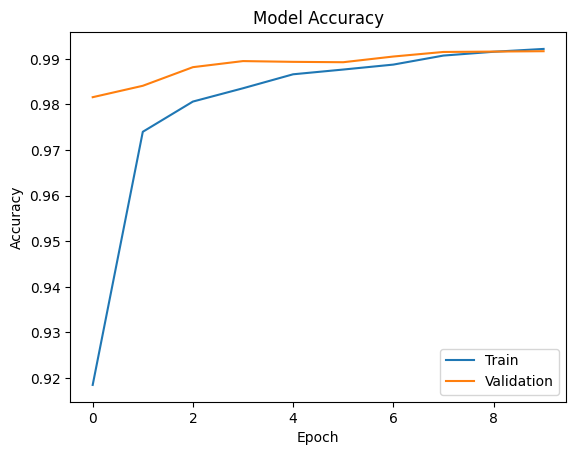

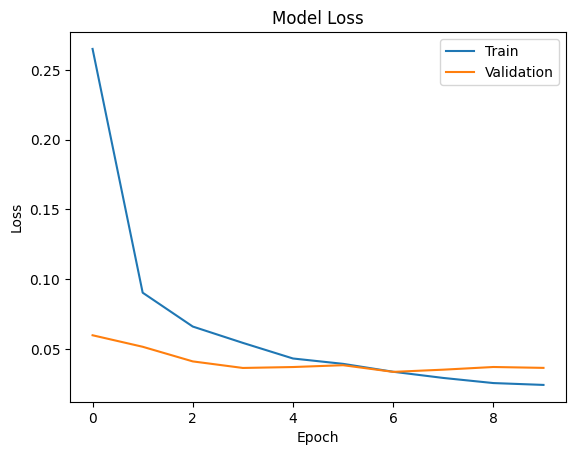

In [10]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


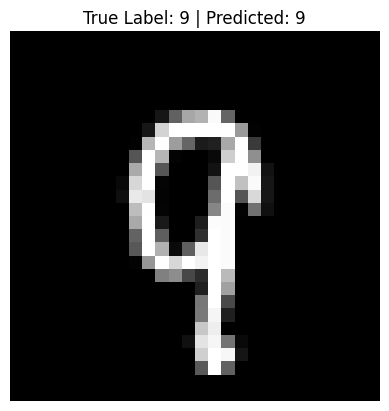

In [11]:
# Select random test image
index = np.random.randint(0, len(X_test))

# Get image and true label
image = X_test[index]
true_label = y_test[index]

# Expand dimensions for prediction
image_expanded = np.expand_dims(image, axis=0)

# Predict
prediction = model.predict(image_expanded)
predicted_label = np.argmax(prediction)

# Show image
plt.imshow(image.reshape(28,28), cmap='gray')
plt.title(f"True Label: {true_label} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()